In [10]:
import pandas as pd # 데이터 분석 목적
import matplotlib.pyplot as plt # 데이터 시각화 목적(산점도 그래프)
plt.rc('font',family="Malgun Gothic") # 데이터 시각화 글씨체 지정
plt.rc('axes',unicode_minus=False) # 데이터 시각화 한글 깨짐 방지
from sklearn.linear_model import LinearRegression # 머신러닝 활용 패키지
from sklearn.model_selection import train_test_split #과적합 문제 해결 (더 랜덤하게 하기)
import warnings
warnings.filterwarnings('ignore') #warning을 무시하는 패키지

dataset=pd.read_csv("data/LinearRegressionData.csv")

In [11]:
#확률적 경사하강법 모델링
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)


In [12]:
from sklearn.linear_model import SGDRegressor # 클래스로 객체 생성
sr=SGDRegressor(max_iter=100, eta0=1e-4, random_state=0, verbose=1) #max_iter=n 내려오는 작업을 n번(반복횟수) 내려오는 횟수 /최적의 값을 찾기 위한 기울기 조절, 지수형태로 표시 가능(1e-4, 1의 -4제곱/ ???
#반복횟수(max_iter,와 eta0를 통해 결과의 차이가 발생)
sr.fit(X_train, y_train)


-- Epoch 1
Norm: 0.35, NNZs: 1, Bias: 0.052848, T: 18, Avg. loss: 1459.086557
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.58, NNZs: 1, Bias: 0.088549, T: 36, Avg. loss: 1377.078721
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.77, NNZs: 1, Bias: 0.118716, T: 54, Avg. loss: 1316.421217
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.94, NNZs: 1, Bias: 0.145771, T: 72, Avg. loss: 1265.173083
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 1.10, NNZs: 1, Bias: 0.170757, T: 90, Avg. loss: 1219.392861
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 1.25, NNZs: 1, Bias: 0.194002, T: 108, Avg. loss: 1177.857453
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 1.39, NNZs: 1, Bias: 0.215872, T: 126, Avg. loss: 1139.974986
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 1.52, NNZs: 1, Bias: 0.236617, T: 144, Avg. loss: 1104.912926
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 1.65, NNZs: 1, Bias: 0.256384, T: 162, Avg. loss: 1072.206158
Total training

,loss,'squared_error'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,100
,tol,0.001
,shuffle,True
,verbose,1
,epsilon,0.1
,random_state,0


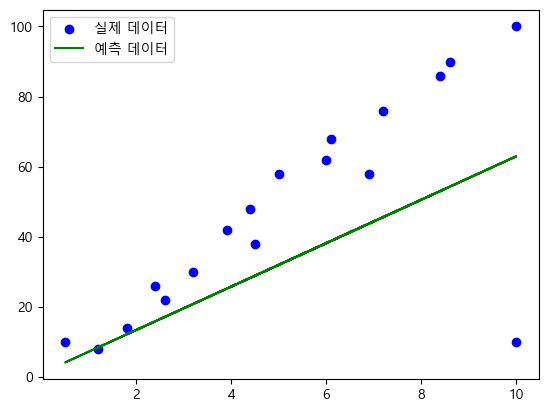

In [13]:
plt.scatter(X_train, y_train, label='실제 데이터',color='b')
plt.plot(X_train,sr.predict(X_train), label='예측 데이터',color='g')
plt.legend()
plt.show()

In [14]:
#y = nx + b #랜덤값 나옴
m=sr.coef_ #기울기 구하는 함수
b=sr.intercept_
m,b

(array([6.19192774]), array([0.99645489]))

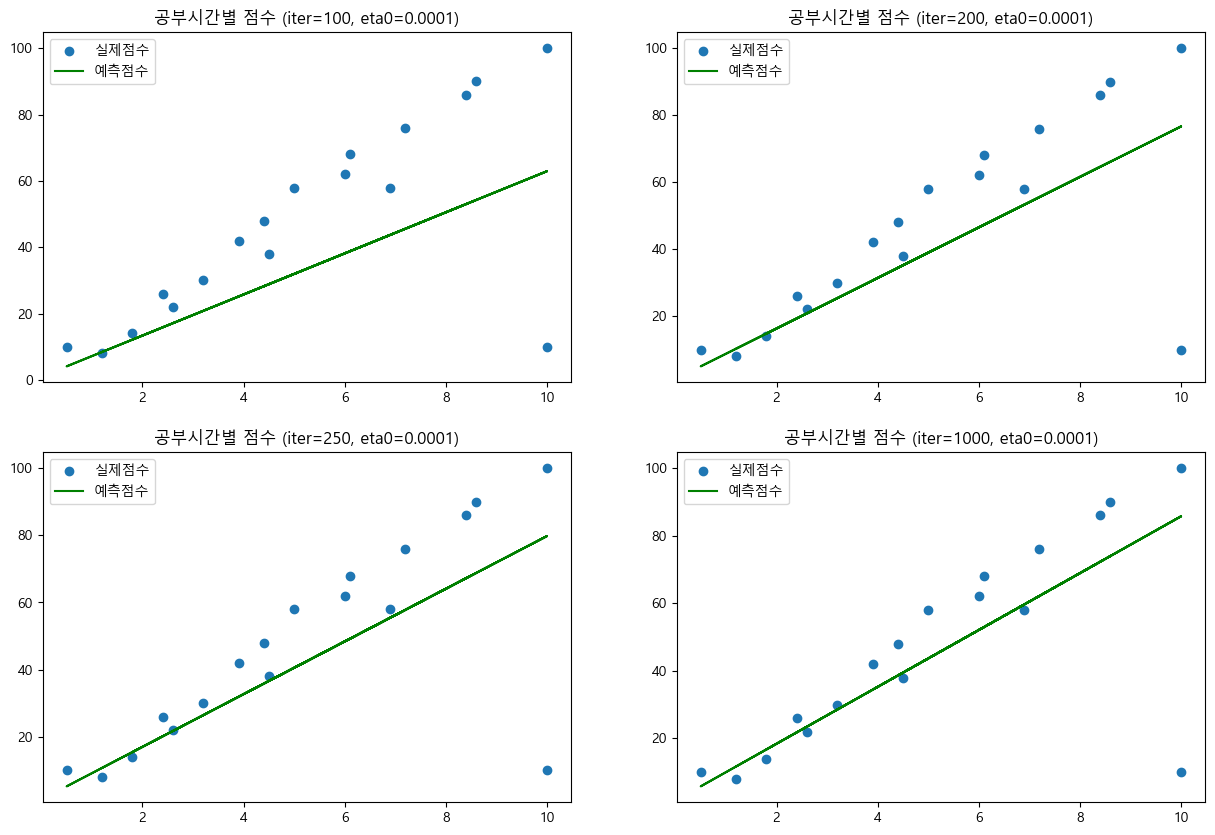

In [15]:
#확률적 경사하강법 모델링
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.2, random_state=0)


iter=[100,200,250,1000]
eta0=0.0001 #1e-4
models=[]
for i in iter:
    sr=SGDRegressor(max_iter=i,eta0=eta0, random_state=0)
    sr.fit(X_train,y_train)
    models.append(sr)


#모델 만들기
fig,axs=plt.subplots(2,2,figsize=(15,10))
axs[0,0].scatter(X_train,y_train, label='실제점수')
axs[0,0].plot(X_train,models[0].predict(X_train), color='g', label='예측점수')
axs[0,0].set_title(f"공부시간별 점수 (iter={iter[0]}, eta0={eta0})")
axs[0,0].legend()

axs[0,1].scatter(X_train,y_train, label='실제점수')
axs[0,1].plot(X_train,models[1].predict(X_train), color='g', label='예측점수')
axs[0,1].set_title(f"공부시간별 점수 (iter={iter[1]}, eta0={eta0})")
axs[0,1].legend()

axs[1,0].scatter(X_train,y_train, label='실제점수')
axs[1,0].plot(X_train,models[2].predict(X_train), color='g', label='예측점수')
axs[1,0].set_title(f"공부시간별 점수 (iter={iter[2]}, eta0={eta0})")
axs[1,0].legend()

axs[1,1].scatter(X_train,y_train, label='실제점수')
axs[1,1].plot(X_train,models[3].predict(X_train), color='g', label='예측점수')
axs[1,1].set_title(f'공부시간별 점수 (iter={iter[3]}, eta0={eta0})')
axs[1,1].legend()

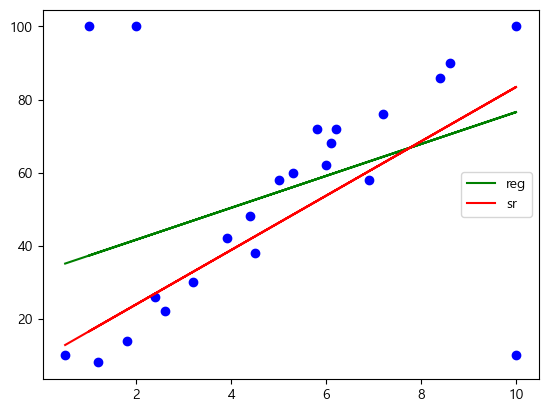

In [16]:
import pandas as pd #데이터 가지고 오기
import matplotlib.pyplot as plt # 그래프 그리기
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression

dataset=pd.read_csv('data/LinearRegressionData.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

reg=LinearRegression()
reg.fit(X, y) # 학습시키기(최소제곱법)

sr=SGDRegressor()
sr.fit(X, y) #학습시키기(경사하강법)

#평가하기
reg.score(X,y), sr.score(X,y) #reg 평가점수(1에 가까울수록 정확함)

#그래프 만들기
plt.scatter(X, y, color='b')
plt.plot(X, reg.predict(X), label='reg', color='g')
plt.plot(X, sr.predict(X), label='sr', color='r')
plt.legend()
plt.show()

In [17]:
#One-Hot Encording (home - library - cafe) home/library 데이터만을 통해 cafe 0,1 여부를 알 수 있음()

In [19]:
dataset=pd.read_csv('data/모델.csv')
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

plt.scatter(X, y, label='실제점수')
plt.plot(X, reg.predict(X), label='예측점수', color='g')
plt.grid(True, ls='--', lw=0.5)
plt.legend()
plt.xlabel('공부시간')
plt.ylabel('시험점수')

FileNotFoundError: [Errno 2] No such file or directory: 'data/모델.csv'